<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Examples: Binary classification metrics
 
© ExploreAI Academy

In this train, we'll look at how to assess the performance of a logistic regression model using various binary classification metrics such as accuracy, precision, recall, and the F1 score.

## Learning objectives

By the end of this train, you should be able to:

* Understand how to use and interpret the confusion matrix and the classification report to assess the performance of a binary classifier.
* Understand the metrics accuracy, precision, recall, and F1 score.
* Know how to implement the various binary classification metrics in Python.

## 1. Building a logistic regression model

We need to train a model in order to assess its performance.

### 1.1 The dataset

Let's use a classic binary classification dataset for this task: the `Wisconsin Breast Cancer` dataset. It consists of **569 observations** with **30 predictors** and a single binary response variable.

Each observation is the result of a scan on a mass of breast tissue for the purpose of **diagnosing or dismissing breast cancer** in a patient.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
# Import dataset
from sklearn.datasets import load_breast_cancer

# Suppress cell warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
X, y = load_breast_cancer(return_X_y=True)

The **target variable**, which we will store in the DataFrame `y`, consists of two classes, each referring to the diagnosis of a scan of a mass of breast tissue:

- **1**: the mass is benign.
- **0**: the mass is malignant.

In [4]:
# Convert to Pandas DataFrames
X = pd.DataFrame(X)
y = pd.DataFrame(y, columns=['Target'])

Let's take a look at the 30 **predictor variables** – all continuous and all encoded to four significant digits.

In [5]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1.2 Training the model

In [6]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Before we move on, let's take a look at the **distribution of observations** between the two classes.

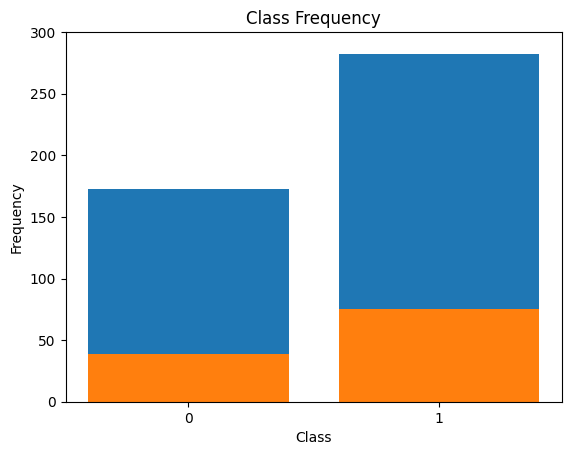

Target
1    357
0    212
Name: count, dtype: int64

In [7]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique, counts)

plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0,1], labels=[0,1])
plt.ylim(top=300)

plt.show()
y['Target'].value_counts()

Take note of the **imbalance** here: there are 357 observations in class 1 and only 212 in class 0.

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
# Create logistic regression model instance
lm = LogisticRegression()

In [10]:
# Train the logistic regression model
lm.fit(X_train,y_train)

LogisticRegression()

In [11]:
# Get the model intercept
lm.intercept_[0]

0.09214876963675654

In [12]:
# Get the model coefficients
coeff_df = pd.DataFrame(lm.coef_.T,X.columns,columns=['Coefficient'])
coeff_df.head()

,Coefficient
0,0.545128
1,0.242345
2,0.602937
3,-0.029939
4,-0.015655


In [13]:
# Get predictions
pred_lm = lm.predict(X_test)

We have made some predictions on the test data. Now, let's compare those predictions to the ground truth labels of the test dataset and determine how well the model has actually performed.

## 2. Assessing model performance using the confusion matrix

A confusion matrix, shown below, is a table that describes the performance of a classification model, or classifier, on a set of test data for which the true values are known.

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/sketch-conf-matrix.png" alt="sketch-conf-matrix" style="width: 400px;"/>

Below are the related terminology, each referring to a separate cell in the confusion matrix above. Note that they represent whole numbers and not proportions.

- **True negatives (TN)**: These are cases in which we predicted a negative result, and the true result is also negative.
- **True positives (TP)**: We predicted a positive result and the true result is positive.
- **False positives (FP)**: We predicted a positive result, but the true result is negative. Also known as a **Type I error**.
- **False negatives (FN)**: We predicted a negative result, but the true result is positive. Also known as a **Type II error**.

Take a moment to familiarise yourself with the table and how we arrive at each of the four categories. Use the sketch below to note which prediction falls into which category.

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/sketch-compare-predictions.png" alt="sketch-compare-predictions" style="width: 450px;"/>

### 2.1 Confusion matrix in `sklearn`

Let's start by importing the `confusion_matrix` object to check the results.

In [14]:
from sklearn.metrics import confusion_matrix

The confusion matrix takes in two arguments: 
- The unseen test data, `y_test`.
- Our predictions, `pred_lm`.

In [15]:
confusion_matrix(y_test, pred_lm)

array([[36,  3],
       [ 5, 70]])

This is not easy to read – let's convert it into a DataFrame and add the appropriate labels to make it clear which value is which.

The matrix orders the rows and columns in a sorted fashion according to the labels. Our labels are 0 and 1, so the first row/column is 0, and the 2nd row/column is 1. Let's give it the appropriate labels.

In [16]:
labels = ['0: Malignant', '1: Benign']

pd.DataFrame(data=confusion_matrix(y_test, pred_lm), index=labels, columns=labels)

,0: Malignant,1: Benign
0: Malignant,36,3
1: Benign,5,70


#### Interpretation:

That looks better. A few notes on the matrix:

- Each **row** represents the **ground truth totals** for _Malignant_ and _Benign_. In other words, the sum of all the values in the first row is the total number of observations in our test dataset labelled _Malignant_.

- Each **column** represents the **totals for the predictions** in each of _Malignant_ and _Benign_.

- The **intersection** of each row/column gives us a different aspect of the results: **TP**, **TN**, **FP**, or **FN**, as described for the table sketched above.

> Therefore, based on the confusion matrix shown here, how many observations did the model classify as `Malignant`, and how many were classified as `Benign`?

### 2.2 Overall accuracy

The results shown above lead us to our first classification metric: **overall accuracy**, which we calculate according to the following formula:

$$Accuracy =  \frac{Correct\space predictions}{Total\space predictions} = \frac{TP + \space TN}{TP \space + \space TN \space + \space FP \space + \space FN}$$

Our overall accuracy is calculated as follows:

$$Accuracy =  \frac{Correct\space predictions}{Total\space predictions} = \frac{70 + 36}{70 + 36 + 3 + 5} = 0.93$$

At first glance, this appears to be a useful, catch-all metric which tells us everything we need to know about our model. The problem is that it lacks detail.

Consider the following scenario:

- We have 100 observations in our test dataset: 90 of them are labelled `No`, the remaining 10 are labelled `Yes`. 

- At prediction time, our model classifies all 100 observations to be in category `No`. Our model made 100 predictions and got all 90 of the `No` observations correct, giving it an overall accuracy of 90%!

- Sounds good right? The problem is that the model got literally none of the `Yes`-labelled observations correct – 0/10! What if the `Yes` cases were for patients who have cancer or a transaction that is fraudulent? Those are important results, and we would have missed all of them.

> That highlights the importance of being accurate – not just overall, but in each particular class too.

Let's look at a few metrics which are a little more comprehensive.

## 3. Assessing model performance using the classification report

The **classification report** gives us more information on where our model is going wrong – looking specifically at the performance caused by **Type I and II errors**.  

The following **metrics** are calculated as **part of the classification report**:

### 3.1 Precision

**Answers:** When it predicts `yes`, how often is it correct? 

$$ Precision = \frac{TP}{TP \space + FP} = \frac{TP}{Total \space Predicted \space Positive} $$

### 3.2 Recall

**Answers:** When the outcome is actually `yes`, how often do we predict it as such?

$$ Recall = \frac{TP}{TP \space + FN} = \frac{TP}{Total \space Actual \space Positive}$$

### 3.3 F1 score

**Answers:** What is the weighted average of precision and recall? 

$$F_1 = 2 \times \frac {Precision \space \times \space Recall }{Precision \space + \space Recall }$$

F1 score might be a better measure to use if we need to **seek a balance** between precision and recall _and_ there is an **uneven class** distribution (large number of 1s vs 0s or vice versa).

### 3.4 Classification report in `sklearn`

Let's import the `classification_report` object to check the results.

In [17]:
from sklearn.metrics import classification_report

Similarly to the confusion matrix, the **classification matrix** takes in **two arguments**: the unseen y_test data as well as our predictions.

In [18]:
print('Classification Report')
print(classification_report(y_test, pred_lm, target_names=['0: Malignant', '1: Benign']))

Classification Report
              precision    recall  f1-score   support

0: Malignant       0.88      0.92      0.90        39
   1: Benign       0.96      0.93      0.95        75

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



#### Interpretation

We now have a far more comprehensive view of the performance of our model.

- Clearly, the precision, recall, and F1 score **values for the Benign class are higher**, and this has to do with the class imbalance we referred to earlier in the tutorial. There are more observations with the Benign label, so the model gets **_better_** at classifying those ones because it has more evidence of them.

- The corresponding **values in the Malignant class are lower** for the same reason.

- The **weighted F1 score** here gives us a good indication using a single value of how well the model is performed. It is somewhere between the accuracies that the model achieved for each of class 0 and 1, but slightly in favour of class 1, of which there were more examples.

- Perhaps the most important information in the above table is in the last row, indicating the weighted average.

- Unlike the values in the `macro avg` row which are computed using: 

$$\frac{class\_0\_metric \quad + \quad class\_1\_metric}{2}$$ 

- The `weighted avg` values are computed using: 

$$\frac{class\_0\_metric \, \times \, \%\_class\_0\_labels  \quad + \quad class\_1\_metric \, \times \, \%\_class\_1\_labels}{2}$$ 

which takes into account the **proportions of each class** fed into the model (as indicated in the `support` column).

## Conclusion

In this train, we have seen or been introduced to:

- Using the confusion matrix to assess the classifications from a binary classifier.
- Understanding the four result categories a classification may fall into (TP, TN, etc.).
- Four metrics for assessing a classifier: accuracy, precision, recall, and F1 score.
- The importance of ensuring good performance in _each class_, as opposed to just overall accuracy.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>